In [ ]:
#@title # Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
import numpy as np
from scipy.signal import butter, lfilter, freqz, filtfilt
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout, BatchNormalization, Bidirectional, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Embedding
from sklearn import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import sklearn
import seaborn

# Data Preprocessing 

> Access only the FFT columns and make it in a dataset

In [ ]:
df = pd.read_csv('emotions.csv')

In [ ]:
df.shape

(2132, 2549)

In [ ]:
df

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [ ]:
le = preprocessing.LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [ ]:
important_cols = df.columns[df.columns.str.contains('fft_')]
subject_a = []
subject_b = []

In [ ]:
len(important_cols)

1500

In [ ]:
subject_a = list(filter(lambda x: x[-1] =='a', important_cols))
subject_b = list(filter(lambda x: x.endswith('b'), important_cols))

In [ ]:
len(subject_a)

750

In [ ]:
type(subject_a)

list

In [ ]:
subject_a[0:2]

['fft_0_a', 'fft_1_a']

In [ ]:
df['fft_0_a']

0      -520.0
1        66.2
2       -90.8
3       119.0
4        59.0
        ...  
2127    171.0
2128   -127.0
2129   -440.0
2130    153.0
2131    122.0
Name: fft_0_a, Length: 2132, dtype: float64

In [ ]:
len(subject_b)

750

In [ ]:
list_of_all_fourier_val_sub_a = df[subject_a].values.tolist()
list_of_all_fourier_val_sub_b = df[subject_b].values.tolist()
y_var_label = df['label'].values.tolist()

In [ ]:
len(list_of_all_fourier_val_sub_b)

2132

In [ ]:
len(list_of_all_fourier_val_sub_a)

2132

In [ ]:
len(y_var_label)

2132

In [ ]:
list_of_items_a = []
list_of_items_b = []

In [ ]:
for index, row in enumerate(list_of_all_fourier_val_sub_a):
  list_of_items_a.append({'fourier-transformed-vals': row,   'label': y_var_label[index]})

In [ ]:
for index, row in enumerate(list_of_all_fourier_val_sub_b):
  list_of_items_b.append({'fourier-transformed-vals': row,   'label': y_var_label[index]})

In [ ]:
print(len(list_of_items_a))
print(len(list_of_items_b))

2132
2132


Data Structure: 

Two lists for each subject's data, where each element of the list is a dictionary that has:
1. X-variable: List of 750 fast fourier transformed values
2. Y-variable: Label that indicates what emotion the set of 750 fourier values correspond to


# Data Filtering

> Filter with Butter Filter



In [ ]:
# Test on one row 
array = np.array(list_of_items_a[0]['fourier-transformed-vals'])
array_squared = np.square(array)
array_inverse = np.abs(np.fft.ifft(array_squared))

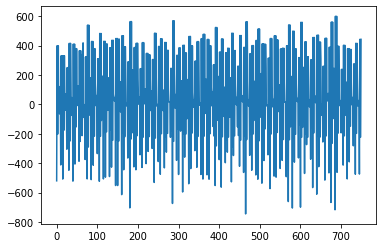

In [ ]:
plt.plot(array, label = list_of_items_a[0]['label'])

Text(0.5, 0, 'time')

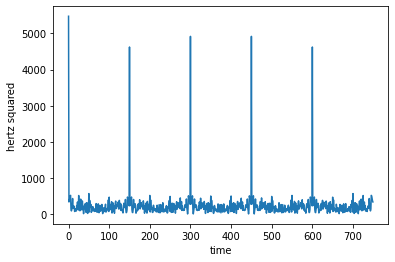

In [ ]:
plt.plot(array_inverse, label = list_of_items_a[0]['label'])
plt.ylabel('hertz squared')
plt.xlabel('time')

In [ ]:
def normalize(filtered_value, max_val):
  return filtered_value/max_val

In [ ]:
b, a = butter(1, 0.5, 'lowpass')
times = np.arange(len(array_inverse))/150
filtered = filtfilt(b, a, array_inverse)
filtered_array = np.array(filtered)
filtered_array = filtered_array[1:]
Normalize = np.vectorize(normalize)
filtered_array = Normalize(filtered_array, np.max(filtered_array))
times_array = np.arange(len(filtered_array))/150
print(len(filtered_array))

749


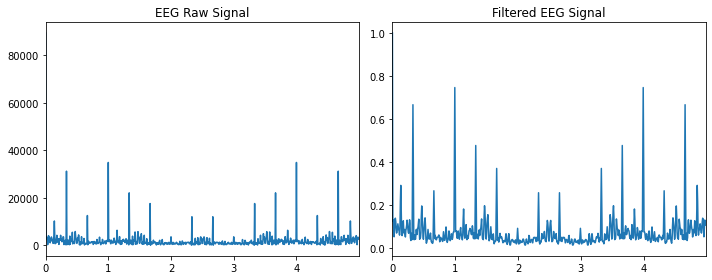

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(times, array_inverse)
plt.title("EEG Raw Signal")
plt.margins(0, .05)

# High val at 0
# Too aggressive w filter (increase cutoff)
# Normalize the data to make it less large (divide by total # of samples)

plt.subplot(122)
plt.plot(times_array, filtered_array)
plt.title("Filtered EEG Signal")
plt.margins(0, .05)

# Periodic signal: Periodic peak of 0.75 volts and 0.33 hz

plt.tight_layout()
plt.show()

In [ ]:
for i in range(len(list_of_items_a)):
  array_inverse = np.abs(np.fft.ifft(np.square(np.array(list_of_items_a[i]['fourier-transformed-vals']))))
  b, a = butter(1, 0.5, 'lowpass')
  filtered_array = np.array(filtfilt(b, a, array_inverse))
  filtered_array = filtered_array[1:]
  Normalize = np.vectorize(normalize)
  filtered_array = Normalize(filtered_array, np.max(filtered_array))
  label = list_of_items_a[i]['label']
  list_of_items_a[i].update({'fourier-transformed-vals': filtered_array,   'label': label})

In [ ]:
for i in range(len(list_of_items_b)):
  array_inverse = np.abs(np.fft.ifft(np.square(np.array(list_of_items_b[i]['fourier-transformed-vals']))))
  b, a = butter(1, 0.5, 'lowpass')
  filtered_array = np.array(filtfilt(b, a, array_inverse))
  filtered_array = filtered_array[1:]
  Normalize = np.vectorize(normalize)
  filtered_array = Normalize(filtered_array, np.max(filtered_array))
  label = list_of_items_b[i]['label']
  list_of_items_b[i].update({'fourier-transformed-vals': filtered_array,   'label': label})

In [ ]:
len(list_of_items_a)

2132

In [ ]:
list_of_items_a[2]['label']

2

In [ ]:
x_data = []
y_data = []

In [ ]:
x_data = []
for element in list_of_items_a:
  x_data.append(element['fourier-transformed-vals'])
y_data_= []
for element in list_of_items_a:
  y_data.append(element['label'])

In [ ]:
for element in list_of_items_b:
  x_data.append(element['fourier-transformed-vals'])
for element in list_of_items_b:
  y_data.append(element['label'])

In [ ]:
print(len(x_data))
print(len(y_data))

4264
4264


In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(
             x_data, y_data, test_size = 0.2, random_state=42)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

In [ ]:
X_train.shape

(3411, 749)

In [ ]:
X_test.shape

(427, 749)

In [ ]:
y_train.shape

(3411,)

In [ ]:
y_test.shape

(427,)

In [ ]:
#X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
#X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')
print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')
print(f'Valid data dimensions: {X_valid.shape}, {y_valid.shape}')

Train data dimensions: (3411, 749), (3411,)
Test data dimensions: (427, 749), (427,)
Valid data dimensions: (426, 749), (426,)


# Model Training

> Experiment with different models

In [ ]:
# Preliminary test with KNN model 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9812646370023419

In [ ]:
# Apply dummies to the y values to make it 3-dimensional. Create 3-dimensional dummy array for predictor variable to pass into model.
y_train = pd.get_dummies(y_train)

In [ ]:
y_train.shape

(3411, 3)

In [ ]:
y_test = pd.get_dummies(y_test)

In [ ]:
y_test.shape

(427, 3)

In [ ]:
y_valid = pd.get_dummies(y_valid)

In [ ]:
y_valid.shape

(426, 3)

In [ ]:
#Define GRU model architecture:
# Find more about it here: https://keras.io/api/layers/recurrent_layers/gru/

inputs = tf.keras.Input(shape=(X_train.shape[1],1))

gru = tf.keras.layers.GRU(256, return_sequences=True)(inputs)
flat = Flatten()(gru)
outputs = Dense(3, activation='softmax')(flat)

model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 749, 1)]          0         
                                                                 
 gru_2 (GRU)                 (None, 749, 256)          198912    
                                                                 
 flatten_2 (Flatten)         (None, 191744)            0         
                                                                 
 dense_2 (Dense)             (None, 3)                 575235    
                                                                 
Total params: 774,147
Trainable params: 774,147
Non-trainable params: 0
_________________________________________________________________


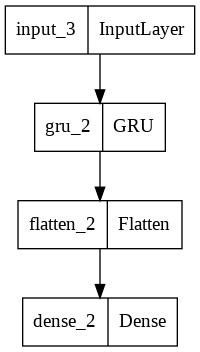

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
def train_model(model,x_train, y_train,x_test,y_test, save_to, epoch = 2):

        opt_adam = tf.keras.optimizers.Adam(learning_rate=0.001)

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        mc = ModelCheckpoint(save_to + 'EEG_Emotion_Predictor.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
        lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
        
        model.compile(optimizer=opt_adam,
                  loss=['categorical_crossentropy'],
                  metrics=['accuracy'])
        
        history = model.fit(x_train,y_train,
                        batch_size=32,
                        epochs=epoch,
                        validation_data=(x_test,y_test),
                        callbacks=[es,mc,lr_schedule])
        
        return model,history

In [ ]:
model,history = train_model(model, X_train, y_train, X_valid, y_valid, save_to= './', epoch = 50) 

Epoch 1/50
107/107 [==============================] - ETA: 0s - loss: 0.3324 - accuracy: 0.8739
Epoch 1: val_accuracy improved from -inf to 0.90376, saving model to ./EEG_Emotion_Predictor.h5
107/107 [==============================] - 188s 2s/step - loss: 0.3324 - accuracy: 0.8739 - val_loss: 0.2397 - val_accuracy: 0.9038 - lr: 0.0010
Epoch 2/50
107/107 [==============================] - ETA: 0s - loss: 0.2083 - accuracy: 0.9135
Epoch 2: val_accuracy improved from 0.90376 to 0.92254, saving model to ./EEG_Emotion_Predictor.h5
107/107 [==============================] - 180s 2s/step - loss: 0.2083 - accuracy: 0.9135 - val_loss: 0.1751 - val_accuracy: 0.9225 - lr: 9.0484e-04
Epoch 3/50
107/107 [==============================] - ETA: 0s - loss: 0.1857 - accuracy: 0.9226
Epoch 3: val_accuracy did not improve from 0.92254
107/107 [==============================] - 208s 2s/step - loss: 0.1857 - accuracy: 0.9226 - val_loss: 0.1741 - val_accuracy: 0.9202 - lr: 8.1873e-04
Epoch 4/50
107/107 [===

In [ ]:
saved_model = tf.keras.models.load_model('EEG_Emotion_Predictor.h5')

#### Got model with a good training accuracy using an RNN structure in Keras. 

# Model Evaluation

> Evaluate model progress with graphs & reports

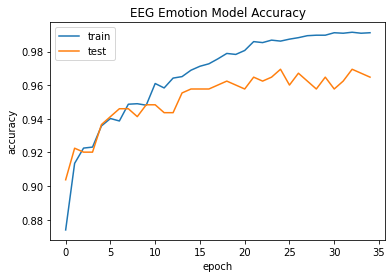

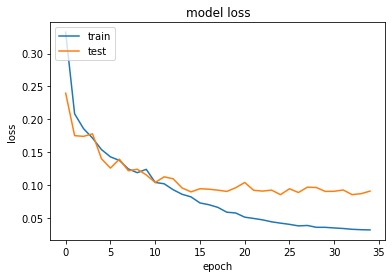

In [ ]:
# Plot graphs 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('EEG Emotion Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Overall test accuracy
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {}".format(model_acc * 100))

Test Accuracy: 98.12646508216858


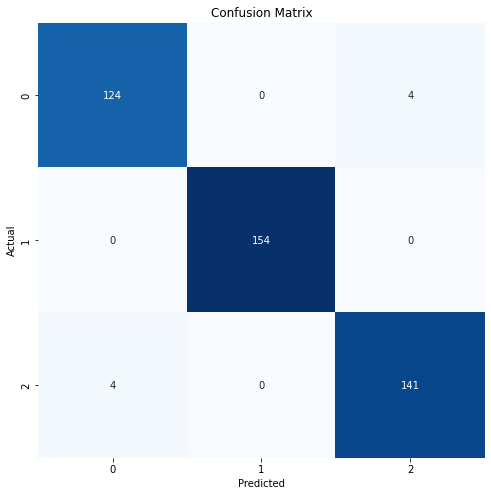

In [ ]:
# Confusion Matrix
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))
y_test = y_test.idxmax(axis=1)

matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
seaborn.heatmap(matrix, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()